# Predictive Model of Heart Disease by Machine Learning



Background Knowledge:

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.


Attribution Content:

1. age 
2. sex 
3. chest pain type (4 values) 
4. resting blood pressure 
5. serum cholestoral in mg/dl 
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved 
9. exercise induced angina 
10. oldpeak = ST depression induced by exercise relative to rest 
11. the slope of the peak exercise ST segment 
12. number of major vessels (0-3) colored by flourosopy 
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [1]:
#importation of all necessary modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#seaborn style

sns.set_style('whitegrid')

In [3]:
#data loading

data = pd.read_csv('heart.csv')

In [4]:
#data preview 

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
#data overview, checking if any feature engineering is needed. Fortunately, the data is clean and well-organized. 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


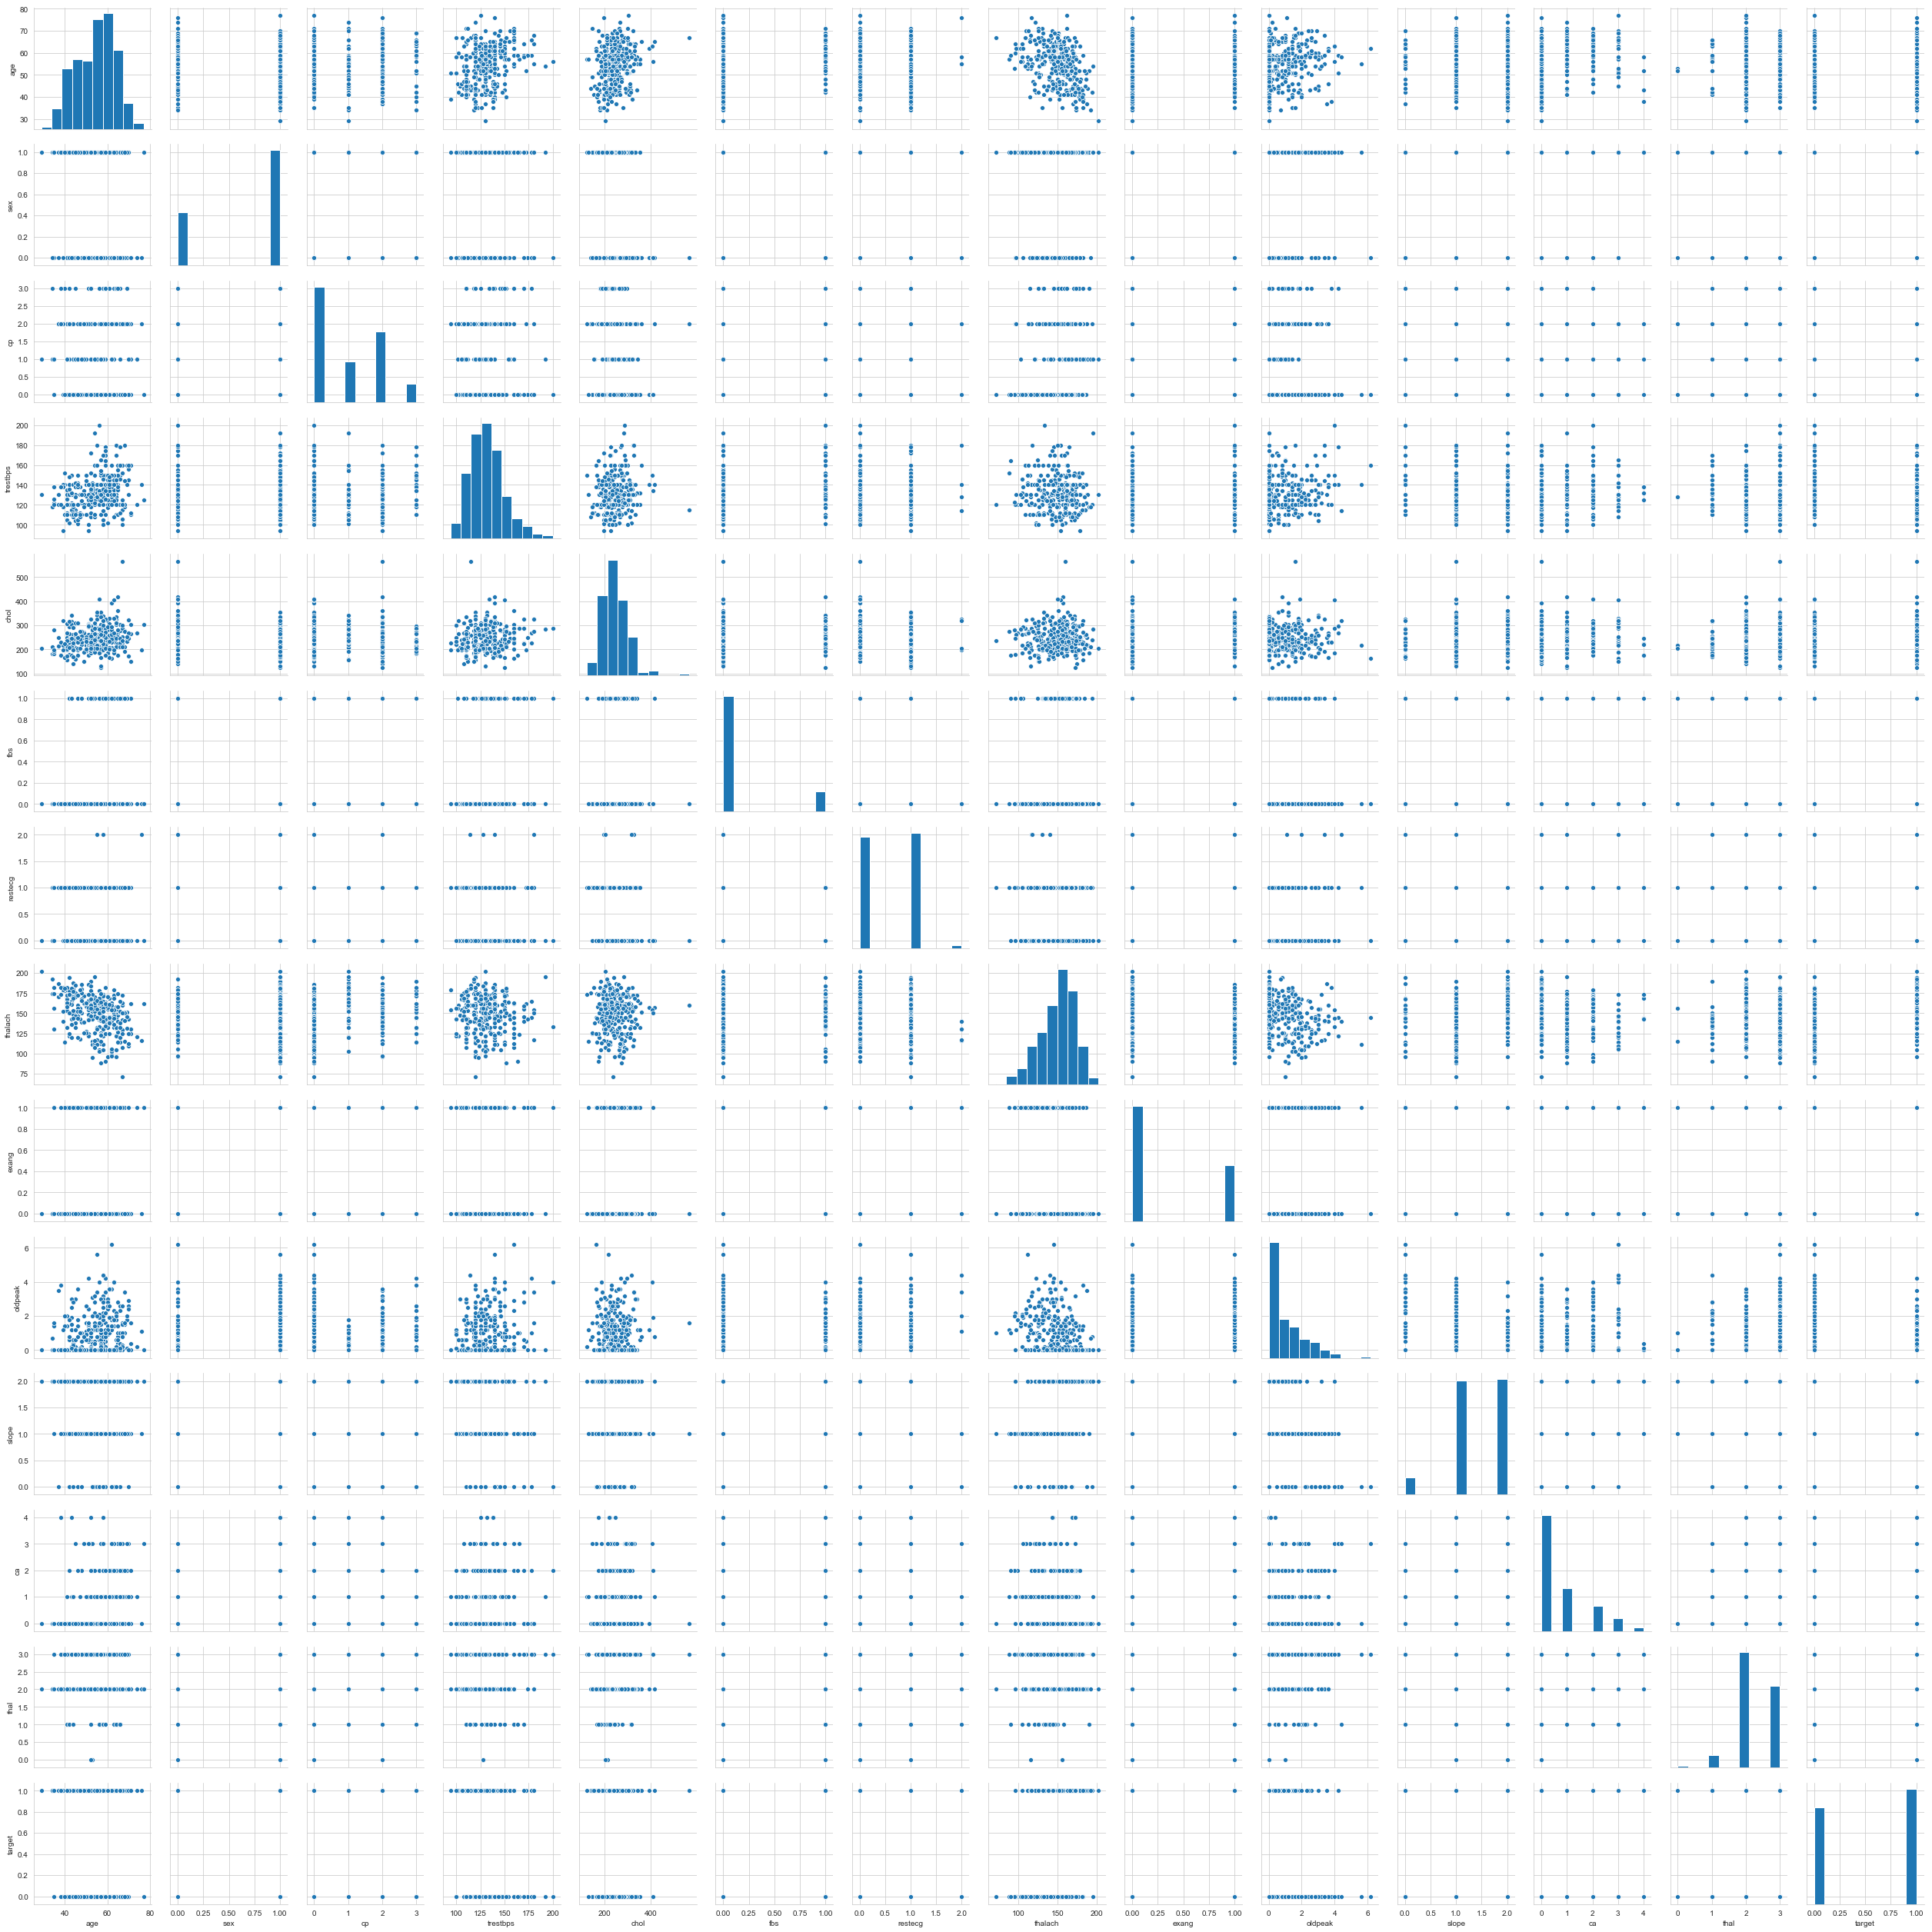

In [6]:
#data preview of the relationships between all featuers
#there migh be some linear relationship between thalach and age. [Need further exploration analysis on this, yet not
#covered in here]

sns.pairplot(data)

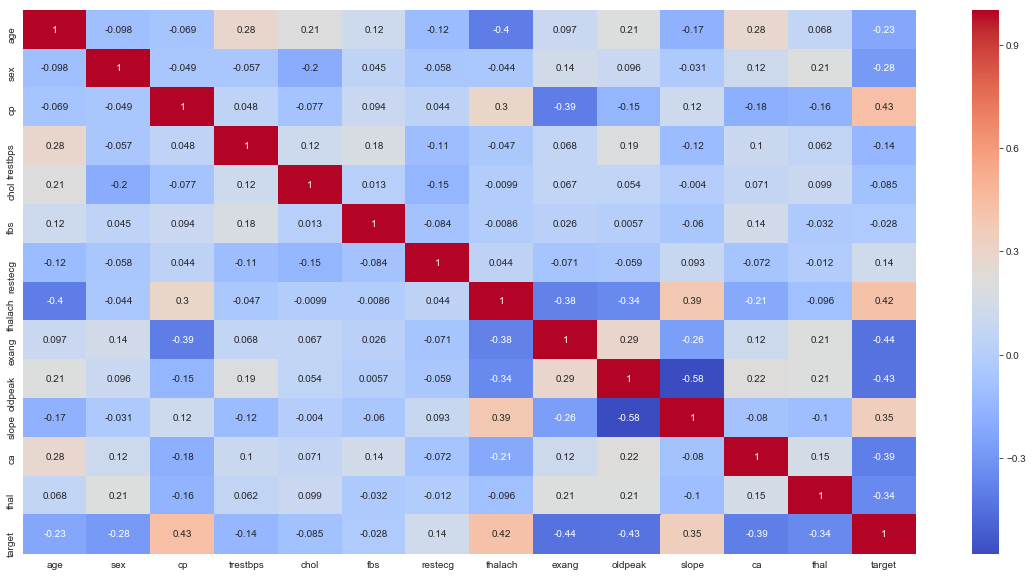

In [7]:
#correlation of each feature with annotation through seaborn heatmap 
#From the graph, there are some correlations between the target and three different featuers: cp, thalach, exang, and 
#old peak.

plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True, cmap='coolwarm')

# Preprocessing Standard Scaler

In [8]:
#standard Scaler because applied units are different in features. 

from sklearn.preprocessing import StandardScaler

feature_data = data.drop(labels = 'target', axis = 1)

scaler = StandardScaler()
scaler.fit(feature_data)
scaler_data = scaler.transform(feature_data)

data_scaled = pd.DataFrame(scaler_data, columns= data.columns[:-1])

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


In [9]:
#distinguishing the X, and y

X = data_scaled
y = data.iloc[:,-1]

In [10]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922


In [11]:
#Outlier finder.
#Assumption: Because the dataset is relativesly small, anything more than 4 standard deviations away from the mean 
#is considered an outlier.


for i in range(0, len(X.columns)):
    if np.sum(X.iloc[:,i] > 4) + np.sum(X.iloc[:,i] < -4) > 0:                               #outlier 
        print('Feature', X.columns[i], 'has ', np.sum(X.iloc[:,i] > 4) + np.sum(X.iloc[:,i] < -4), ' outliers.')
    else:                                                                                    #non-outlier
        print('Feature', X.columns[i], 'has no outliers.')


Feature age has no outliers.
Feature sex has no outliers.
Feature cp has no outliers.
Feature trestbps has no outliers.
Feature chol has  1  outliers.
Feature fbs has no outliers.
Feature restecg has no outliers.
Feature thalach has no outliers.
Feature exang has no outliers.
Feature oldpeak has  1  outliers.
Feature slope has no outliers.
Feature ca has no outliers.
Feature thal has no outliers.


In [12]:
 #Below is the row of outliers

X[(X.loc[:,'chol'] > 4) | (X.loc[:,'chol'] < -4) | (X.loc[:,'oldpeak'] > 4) | (X.loc[:,'oldpeak'] < -4)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
85,1.393352,-1.468418,1.002577,-0.949431,6.140401,-0.417635,-1.005832,0.452748,-0.696631,0.483451,-0.649113,-0.714429,1.123029
204,0.841908,-1.468418,-0.938515,1.620649,-1.589792,-0.417635,-1.005832,-0.203210,-0.696631,4.451851,-2.274579,2.224104,1.123029


In [13]:
#Found that there are the existence of outliers in the features, I'd deal with this issue by dropping the outlier.

X.drop(labels= [85,204], axis=0, inplace= True)
y.drop(labels= [85,204], axis=0, inplace= True)

In [14]:
#checking if the outliers are removed from the data by running the outlier finder again

for i in range(0, len(X.columns)):
    if np.sum(X.iloc[:,i] > 4) + np.sum(X.iloc[:,i] < -4) > 0:                               #outlier 
        print('Feature', X.columns[i], 'has ', np.sum(X.iloc[:,i] > 4) + np.sum(X.iloc[:,i] < -4), ' outliers.')
    else:                                                                                    #non-outlier
        print('Feature', X.columns[i], 'has no outliers.')

Feature age has no outliers.
Feature sex has no outliers.
Feature cp has no outliers.
Feature trestbps has no outliers.
Feature chol has no outliers.
Feature fbs has no outliers.
Feature restecg has no outliers.
Feature thalach has no outliers.
Feature exang has no outliers.
Feature oldpeak has no outliers.
Feature slope has no outliers.
Feature ca has no outliers.
Feature thal has no outliers.


In [15]:
#Checking if the number of rows is correct after eliminating the outliers.
#Before 303. After 301. This is the correct number of rows. Now we are ready for some predictive modelings.

X.count()

age         301
sex         301
cp          301
trestbps    301
chol        301
fbs         301
restecg     301
thalach     301
exang       301
oldpeak     301
slope       301
ca          301
thal        301
dtype: int64

In [16]:
y.count()

301

# K Nearest Neighbors model

In [17]:
#importing libraries

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [18]:
#cross validation on Knn model with n_neighbors = 5 at cv = 10, and finding the mean value of scores.

knn = KNeighborsClassifier(n_neighbors = 5)
scores_list = cross_val_score(knn, X, y, cv=10, scoring = 'accuracy')
scores_list.mean()

0.809851687059696

In [19]:
#advantages of applying cross validation: 
#  1. More accurate estimate of out-of-sample accuracy
#  2. More efficient use of data(every observation is used for both training and testing)

In [20]:
#cross validating on knn model, intending to explore the optimized value for n_neighbor at cv=10

x_range = range(1,31)
score_list_knn= []

for i in x_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    score_list_knn.append(cross_val_score(knn, X, y, cv=10, scoring = 'accuracy').mean())

print (score_list_knn)

[0.7542528735632185, 0.7570263255469041, 0.8000667408231369, 0.8067334074898035, 0.809851687059696, 0.8225250278086763, 0.8128550241008528, 0.8126251390433815, 0.8296440489432703, 0.8265257693733778, 0.8229773822766037, 0.8129699666295884, 0.8195291064145348, 0.8328772710418985, 0.8229773822766037, 0.8262031887282164, 0.8394364108268446, 0.8294289951798295, 0.8291991101223581, 0.8258657767890248, 0.8262031887282164, 0.8163032999629218, 0.8295365220615498, 0.8261957730812013, 0.8227474972191324, 0.8260808305524657, 0.8295291064145346, 0.8296440489432703, 0.8297589914720058, 0.826310715609937]


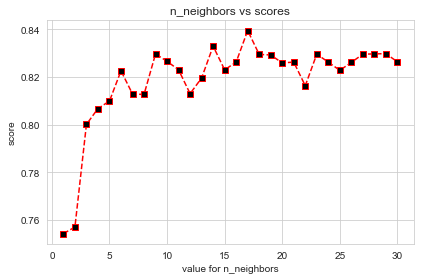

In [21]:
#Visualizing n_neighbors vs scores

plt.plot(x_range, score_list_knn, color = 'red', markerfacecolor = 'black', marker='s', linestyle= '--' )
plt.xlabel('value for n_neighbors')
plt.ylabel('score')
plt.title('n_neighbors vs scores')
plt.tight_layout()

In [22]:
#finding the optimal value for n_neighbor at 10-fold cross validation 

optimal_n_knn = np.argmax(score_list_knn) + 1        #nth element is actually n+1 for value n
optimal_n_knn_score = np.max(score_list_knn)
print('optimal value for n_neighbor: ', optimal_n_knn)
print('score: ', optimal_n_knn_score)

optimal value for n_neighbor:  17
score:  0.8394364108268446


[NOTE] After cross-validation, the optimized value of n_neighbor for K-nearest neighbor machine learning model is 17, where it produces the accuracy score of 83.94%. 

# Random Forest Classifier model (1)
pre-decided n_estimators = 1

In [23]:
#importation of Random Forest Classifier model

from sklearn.ensemble import RandomForestClassifier

In [24]:
#random forest classfiier model with n_estimators= 30, setting random_state at 42 so that we have consistent results
#for analysis
#first, need to make split traing and test dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

rfc = RandomForestClassifier(n_estimators = 30, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [25]:
#Exploring the importance of every features conducted by the rfc.fit at n_estimators= 30

feature_importance = pd.DataFrame(rfc.feature_importances_,X_train.columns, columns=['Feature Importance'])

feature_importance

,Feature Importance
age,0.086169
sex,0.031725
cp,0.128029
trestbps,0.059507
chol,0.076688
fbs,0.008519
restecg,0.022136
thalach,0.111300
exang,0.091017
oldpeak,0.112570


In [26]:
#As the feature importance result indicates, the following feature is the most influential feature that affacts our
#model, a random forest classifier model at n_estimator = 30, with the highest contribution rate.

feature_importance.iloc[(np.argmax(rfc.feature_importances_))]

Feature Importance    0.128029
Name: cp, dtype: float64

In [27]:
#On the other hand, the following result would be the least influential feature that affacts our model,
#a random of forest classifier model at n_estimator = 30, with the lowest contribution rate.

feature_importance.iloc[(np.argmin(rfc.feature_importances_))]

Feature Importance    0.008519
Name: fbs, dtype: float64

# Random Forest Classifier model (2)
Iteration of n_estimators in finding the optimized n_estimator

In [28]:
#cross validating on random forest classifier model, intending to explore the optimized value for n_estimator at cv=10

x_range = range(1,150)
score_list_rfc = []

for i in x_range:
    rfc = RandomForestClassifier(n_estimators=i, random_state=42)
    score_list_rfc.append(cross_val_score(rfc, X, y, cv=10, scoring='accuracy').mean())

print(score_list_rfc)

[0.7539451242120874, 0.7470485724879496, 0.7871931776047459, 0.7738598442714126, 0.770289210233593, 0.7641824249165738, 0.7702966258806081, 0.7734149054505005, 0.7832999629217648, 0.8031998516870598, 0.8063107156099371, 0.7900815721171672, 0.7897515758249908, 0.7834149054505005, 0.7835298479792361, 0.7868631813125695, 0.7966481275491286, 0.7933147942157953, 0.8167630700778643, 0.8166555431961438, 0.8132072673340749, 0.8168854282536151, 0.8233296255098258, 0.8234371523915461, 0.8268854282536152, 0.8169855394883203, 0.813429736744531, 0.8204338153503894, 0.8202113459399334, 0.8133147942157954, 0.8235446792732667, 0.8202113459399334, 0.8236596218020024, 0.8137597330367076, 0.8169855394883203, 0.8168780126066, 0.8172080088987764, 0.8202113459399334, 0.8234371523915461, 0.8168780126066, 0.8201038190582128, 0.8168780126066, 0.8168780126066, 0.8201038190582128, 0.8067556544308492, 0.8031998516870598, 0.8067556544308492, 0.8099814608824619, 0.8064182424916574, 0.8064182424916574, 0.80319243604

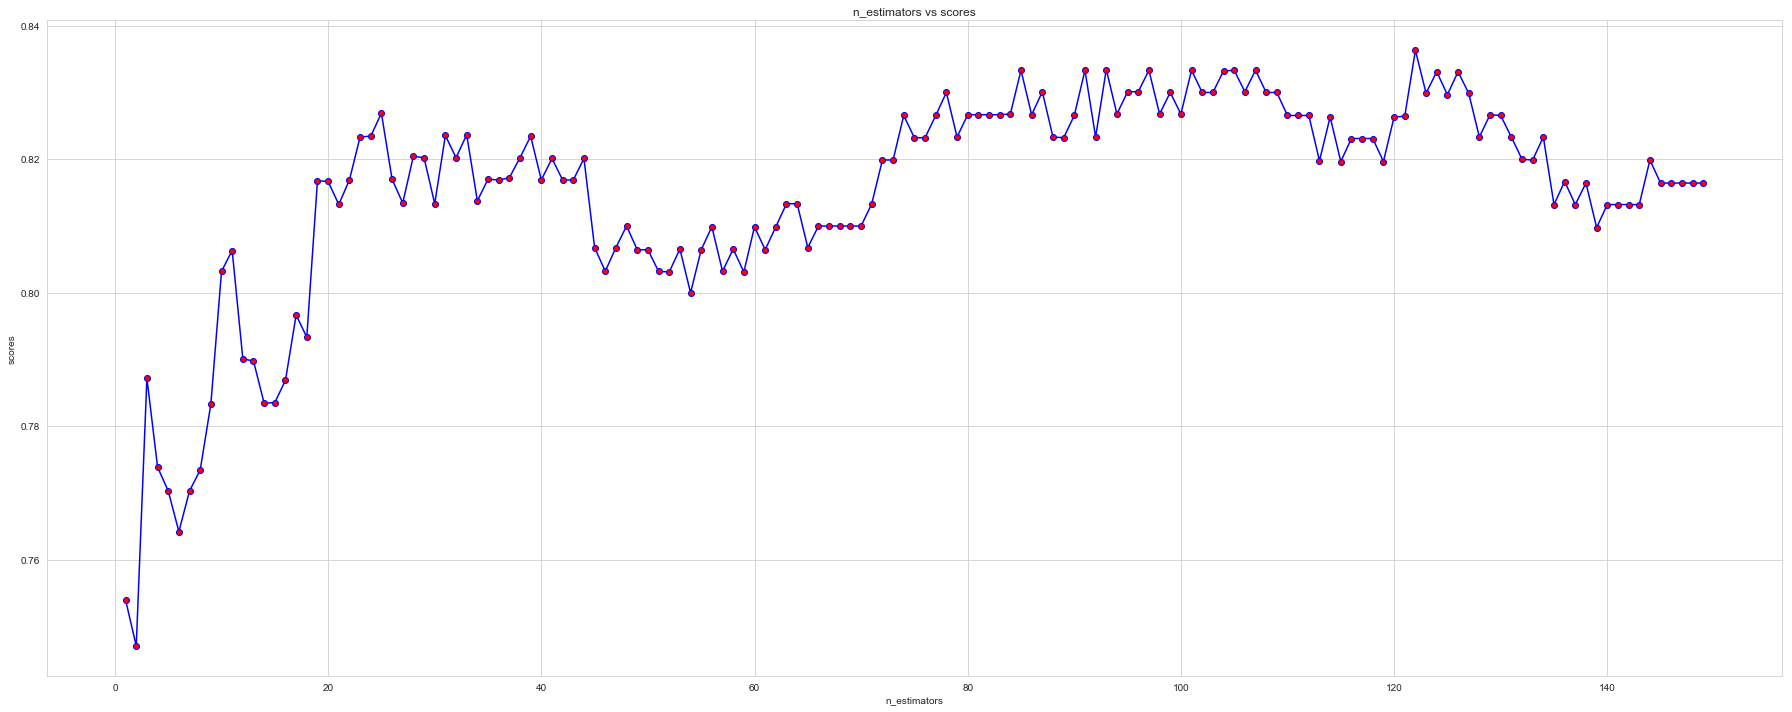

In [29]:
#visualization on n_estimators vs scores

plt.figure(figsize= (25,10))
plt.plot(x_range, score_list_rfc, color = 'blue', markerfacecolor = 'red', marker='o', linestyle= '-' )
plt.xlabel('n_estimators')
plt.ylabel('scores')
plt.title('n_estimators vs scores')
plt.tight_layout()

In [30]:
#finding the optimal value for n_estimators

optimal_n_rfc = np.argmax(score_list_rfc) + 1        #nth element is actually n+1 for value n
optimal_n_rfc_score = np.max(score_list_rfc)
print('optimal value for n_neighbor: ', optimal_n_rfc)
print('score: ', optimal_n_rfc_score)

optimal value for n_neighbor:  122
score:  0.8363255469039675


[NOTE] After cross-validation, the optimized value of n_estimator for Random Forest Classifier machine learning model is 52, where it produces the accuracy score of 84.62%. 

In [31]:
#exploring feature importance at the optimal n_estimator of random forest classifier model

rfc = RandomForestClassifier(n_estimators = np.argmax(score_list_rfc), random_state=42)
rfc.fit(X_train, y_train)

rfc_feature_importance = pd.DataFrame(rfc.feature_importances_, X_train.columns, columns=['Feature Importance'])
rfc_feature_importance

,Feature Importance
age,0.084243
sex,0.027773
cp,0.125539
trestbps,0.061386
chol,0.075315
fbs,0.013619
restecg,0.021427
thalach,0.123105
exang,0.082008
oldpeak,0.114833


In [32]:
#As the feature importance result indicates, the following feature is the most influential feature that affacts our
#model, a random forest classifier at its optimized n_estimator, with the highest contribution rate.

feature_importance.iloc[(np.argmax(rfc.feature_importances_))]

Feature Importance    0.128029
Name: cp, dtype: float64

In [33]:
#On the other hand, the following feature would be the least influential feature affacts our model, a random forest 
#classifier at its optimized n_estimator, with the lowest contribution rate.

feature_importance.iloc[(np.argmin(rfc.feature_importances_))]

Feature Importance    0.008519
Name: fbs, dtype: float64

# Support Vector Classifier with GridSearch

In [34]:
#train_test_split X and y

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [35]:
#setting parameter for GridSearch

param_grid = [{'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']},
              {'C':[0.1, 1, 10, 100, 1000], 'kernel':['linear']}]

In [36]:
#importation of necessary libraries

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [37]:
#applying GridSearh to find the optimal SVC model with the best combination of parameters 

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3, cv = 10, scoring='accuracy')
grid.fit(X_train,y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.5238095238095238, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.5238095238095238, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.5238095238095238, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ........... C=0.1, gamma=1, kernel=rbf, score=0.55, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ........... C=0.1, gamma=1, kernel=rbf, score=0.55, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ........... C=0.1, gamma=1, kernel=rbf, score=0.55, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  C=0.1, gamma=0.001, kernel=rbf, score=0.5263157894736842, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV]  C=0.1, gamma=0.0001, kernel=rbf, score=0.5238095238095238, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV]  C=0.1, gamma=0.0001, kernel=rbf, score=0.5238095238095238, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV]  C=0.1, gamma=0.0001, kernel=rbf, score=0.5238095238095238, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ...... C=0.1, gamma=0.0001, kernel=rbf, score=0.55, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ...... C=0.1, gamma=0.0001, kernel=rbf, score=0.55, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ...... C=0.1, gamma=0.0001, kernel=rbf, score=0.55, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .........

[CV] ......... C=10, gamma=0.01, kernel=rbf, score=0.85, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] .......... C=10, gamma=0.01, kernel=rbf, score=0.8, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] .......... C=10, gamma=0.01, kernel=rbf, score=0.8, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] .......... C=10, gamma=0.01, kernel=rbf, score=0.8, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] .......... C=10, gamma=0.01, kernel=rbf, score=0.9, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.7368421052631579, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.6842105263157895, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ................................

[CV] ........ C=1000, gamma=0.1, kernel=rbf, score=0.75, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ........ C=1000, gamma=0.1, kernel=rbf, score=0.75, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ........ C=1000, gamma=0.1, kernel=rbf, score=0.65, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ......... C=1000, gamma=0.1, kernel=rbf, score=0.8, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ........ C=1000, gamma=0.1, kernel=rbf, score=0.85, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.6842105263157895, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.47368421052631576, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf ............................

[CV] ... C=100, kernel=linear, score=0.8095238095238095, total=   0.1s
[CV] C=100, kernel=linear ............................................
[CV] ... C=100, kernel=linear, score=0.9523809523809523, total=   0.0s
[CV] C=100, kernel=linear ............................................
[CV] .................. C=100, kernel=linear, score=1.0, total=   0.1s
[CV] C=100, kernel=linear ............................................
[CV] .................. C=100, kernel=linear, score=0.8, total=   0.0s
[CV] C=100, kernel=linear ............................................
[CV] .................. C=100, kernel=linear, score=0.8, total=   0.0s
[CV] C=100, kernel=linear ............................................
[CV] ................. C=100, kernel=linear, score=0.85, total=   0.0s
[CV] C=100, kernel=linear ............................................
[CV] .................. C=100, kernel=linear, score=0.8, total=   0.1s
[CV] C=100, kernel=linear ............................................
[CV] .

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    8.5s finished
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}, {'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=3)

In [38]:
grid.best_params_

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

In [39]:
grid.best_estimator_

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [40]:
optimal_n_svc_score = grid.best_score_
optimal_n_svc_score

0.835820895522388

[NOTE] After GridSearch with cross-validation, the optimized value for C is 100, and the best kernel is rbf. Suppoert Vector Classifier machine learning model has the accuracy score of 83.58%.

In [41]:
#Resulting scores for all optimized models.

print('knn: ', optimal_n_knn_score)
print('rfc: ', optimal_n_rfc_score)
print('svc: ', optimal_n_svc_score)

knn:  0.8394364108268446
rfc:  0.8363255469039675
svc:  0.835820895522388


# Conclusion

In conclusion, all the models of KNN, RandomForest, and SVC generate accuracy scores of higher than 83%.
I would not conclude by claiming which model is more effective due to the fact that three models do not have a significant difference in scores.
However in terms of time efficiency, it is obvious that K nearest neighbor model runs relatively faster than the other two models. 
On the other hand in terms of scores, KNN seems to have the highest score among all the models with 83.94%